# Projekt PRiAD Natalia Biernacka, Anton Libik
### Wybrany zbiór danych: Titanic Survival Prediction Dataset


### Pobranie i wczytanie danych

Import niezbędnych pakietów

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.2f}".format 

In [5]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset") 
print("Path to dataset files:", path)

file_path = os.path.join(path, 'Titanic-Dataset.csv')
dane = pd.read_csv(file_path)
dane.head()

Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


### Analiza eksploracyjna

1) Wyznaczamy liczbę obiektów, liczbę atrybutów. Usuwamy kolumny PassengetId, Ticket i Name - nie są one potrzebne dla dalszej analizy.


In [6]:
# liczba obiektów
print("Liczba obiektów:", dane.shape[0])

# liczba atrybutów
print("Liczba atrybutow:", dane.shape[1])

# usuwanie kolumny PassengerId i Name
dane.drop(columns=['PassengerId'], inplace=True)
dane.drop(columns=['Name'], inplace=True)
dane.drop(columns=['Ticket'], inplace=True)

Liczba obiektów: 891
Liczba atrybutow: 12


2. Liczba obiektów, reprezentujących pasażerów, którzy przeżyli (atrybut survived ma 1) i którzy nie (survived = 0)

In [7]:
survivedDF = dane[dane.Survived == 1]

notSurvivedDF = dane[dane.Survived == 0]

print("Liczba pasażerów, którzy przeżyli: ", survivedDF.shape[0])
print("Liczba pasażerów, którzy nie przeżyli: ", notSurvivedDF.shape[0])

procent = survivedDF.shape[0] / dane.shape[0] * 100
print("Ile procent przeżyło: ", round(procent, 2), "%")

Liczba pasażerów, którzy przeżyli:  342
Liczba pasażerów, którzy nie przeżyli:  549
Ile procent przeżyło:  38.38 %


3. Liczba brakujących danych w poszczególnych kolumnach

In [8]:
dane.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

4. Usuwamy kolumnę "Cabin", ponieważ zawiera dużą liczbę brakujących danyh i będzie przeszkadać analizie. Zamiast brakujących danych w kolumnie "Age" wstawiamy dane średniego wieku.

In [9]:
# usuwamy kolumnę Cabin
dane.drop(columns=['Cabin'], inplace=True)

# wstawiamy średni wiek zamiast brakujących danych w kolumnie Age
dane['Age'] = dane['Age'].fillna(dane['Age'].median())

# sprawdzamy liczbę brakujących danych 
dane.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

5. Usuwamy pozostałe brakujące dane

In [10]:
dane = dane.dropna()

dane.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

6. Zbiór został przygotowany do analizy ekploracyjnej, ostateczna liczba obiektów i atrybutów:

In [11]:
# liczba obiektów
print("Liczba obiektów:", dane.shape[0])

# liczba atrybutów
print("Liczba atrybutow:", dane.shape[1])

Liczba obiektów: 889
Liczba atrybutow: 8


##### Analiza zmienności atrybutów bez odniesienia do przeżycia

       Survived  Pclass    Age  SibSp  Parch   Fare
count    889.00  889.00 889.00 889.00 889.00 889.00
mean       0.38    2.31  29.32   0.52   0.38  32.10
std        0.49    0.83  12.98   1.10   0.81  49.70
min        0.00    1.00   0.42   0.00   0.00   0.00
25%        0.00    2.00  22.00   0.00   0.00   7.90
50%        0.00    3.00  28.00   0.00   0.00  14.45
75%        1.00    3.00  35.00   1.00   0.00  31.00
max        1.00    3.00  80.00   8.00   6.00 512.33


<Axes: xlabel='Embarked', ylabel='Count'>

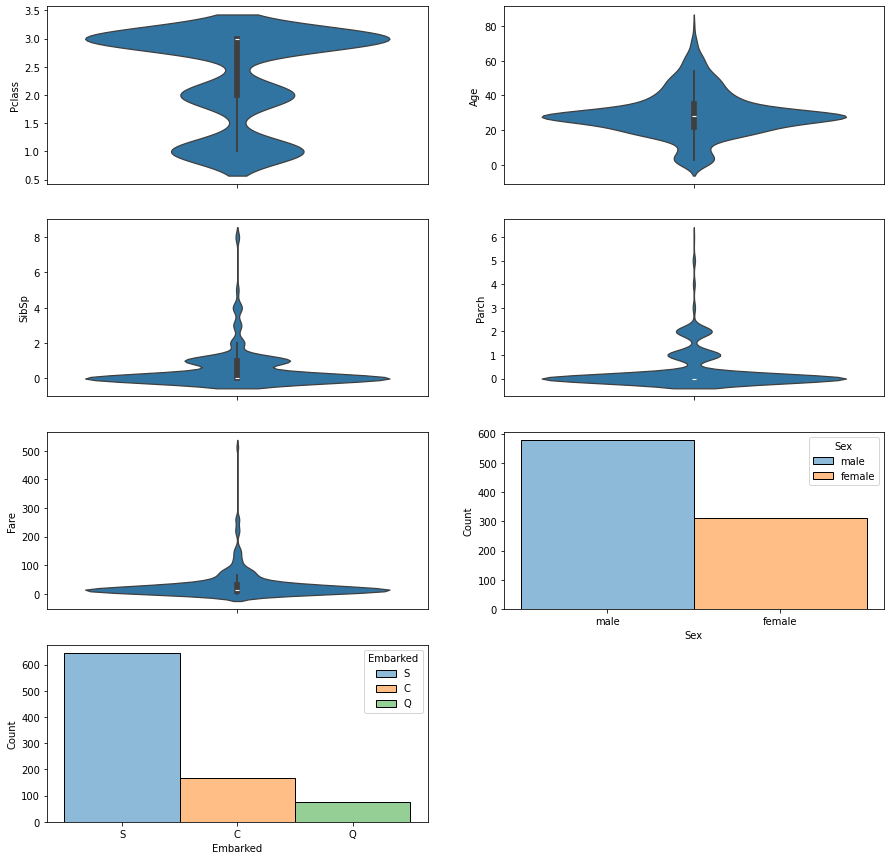

In [12]:
print(dane.describe())

plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
sns.violinplot(data=dane['Pclass'])
plt.subplot(4,2,2)
sns.violinplot(data=dane['Age'])
plt.subplot(4,2,3)
sns.violinplot(data=dane['SibSp'])
plt.subplot(4,2,4)
sns.violinplot(data=dane['Parch'])
plt.subplot(4,2,5)
sns.violinplot(data=dane['Fare'])
plt.subplot(4,2,6)
sns.histplot(data=dane, x="Sex", hue="Sex")
plt.subplot(4,2,7)
sns.histplot(data=dane, x="Embarked", hue="Embarked")

##### Analiza zmienności atrybutów w zależności od przeżycia

       Survived  Pclass    Age  SibSp  Parch   Fare
count    549.00  549.00 549.00 549.00 549.00 549.00
mean       0.00    2.53  30.03   0.55   0.33  22.12
std        0.00    0.74  12.50   1.29   0.82  31.39
min        0.00    1.00   1.00   0.00   0.00   0.00
25%        0.00    2.00  23.00   0.00   0.00   7.85
50%        0.00    3.00  28.00   0.00   0.00  10.50
75%        0.00    3.00  35.00   1.00   0.00  26.00
max        0.00    3.00  74.00   8.00   6.00 263.00
       Survived  Pclass    Age  SibSp  Parch   Fare
count    340.00  340.00 340.00 340.00 340.00 340.00
mean       1.00    1.96  28.16   0.48   0.47  48.21
std        0.00    0.86  13.67   0.71   0.77  66.75
min        1.00    1.00   0.42   0.00   0.00   0.00
25%        1.00    1.00  21.00   0.00   0.00  12.44
50%        1.00    2.00  28.00   0.00   0.00  26.00
75%        1.00    3.00  35.00   1.00   1.00  56.95
max        1.00    3.00  80.00   4.00   5.00 512.33


<Axes: xlabel='Survived', ylabel='count'>

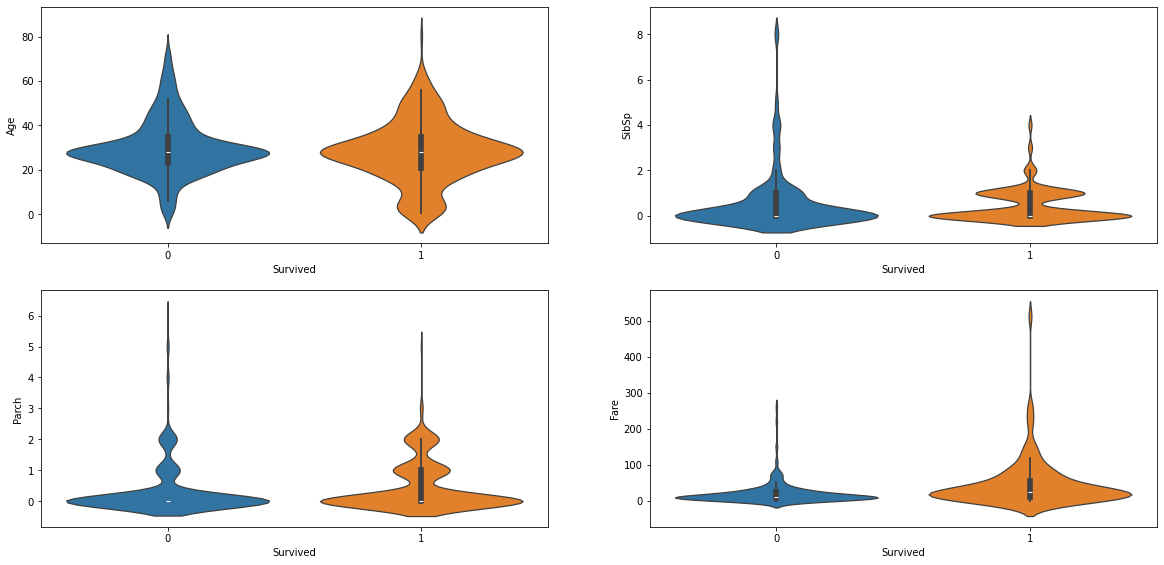

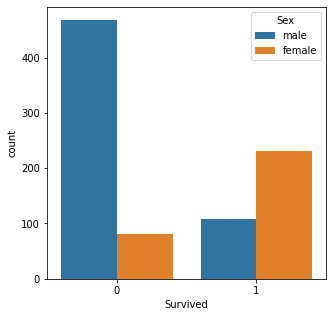

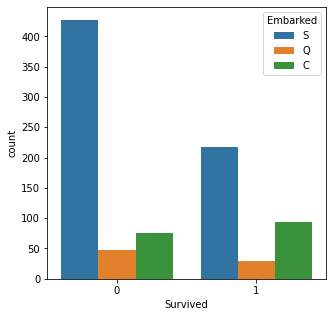

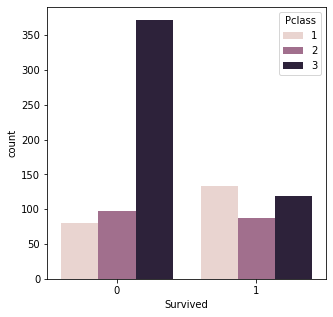

In [13]:
print(dane[dane['Survived'] == 0].describe())
print(dane[dane['Survived'] == 1].describe())
plt.figure(figsize= (20,20))
plt.subplot(4, 2, 1)
sns.violinplot(x = 'Survived', y = 'Age', data=dane, legend=False, hue = 'Survived')
plt.subplot(4, 2, 2)
sns.violinplot(x = 'Survived', y = 'SibSp', data=dane, legend=False, hue = 'Survived')
plt.subplot(4, 2, 3)
sns.violinplot(x = 'Survived', y = 'Parch', data=dane, legend=False, hue = 'Survived')
plt.subplot(4, 2, 4)
sns.violinplot(x = 'Survived', y = 'Fare', data=dane, legend=False, hue = 'Survived')
plt.figure(figsize= (5,5))
plt.xticks([0, 1])
sns.countplot(data=dane, x="Survived", hue="Sex")
plt.figure(figsize= (5,5))
plt.xticks([0, 1])
sns.countplot(data=dane, x="Survived", hue="Embarked")
plt.figure(figsize= (5,5))
plt.xticks([0, 1])
sns.countplot(data=dane, x="Survived", hue="Pclass")

Wnioski
* Rozkład wartości atrybutów Age, SibSp, Parch i Fare dla pasażerów, którzy przeżyli i nie przeżyli jest podobny. Możemy zaobserwować, że w przypadku grupy dzieci (wiek ok. 10 lat) oraz osób, których cena biletu wynosiła powyżej 100, większość przezyła
* Przeżywalność jest w dużym stopniu zależna od płci. Większość kobiet przeżyła, zaś znaczna większość mężczyzn zginęła.
* Port, z którego pasażer wszedł na pokład nie ma większego znaczenia.
* Na przeżywalność silnie wpłynęła klasa, w której podróżował pasażer - większość osób z klasy 1 przeżyła zaś z klasy 3 zdecydowana większość zginęła

##### Wykres punktowy

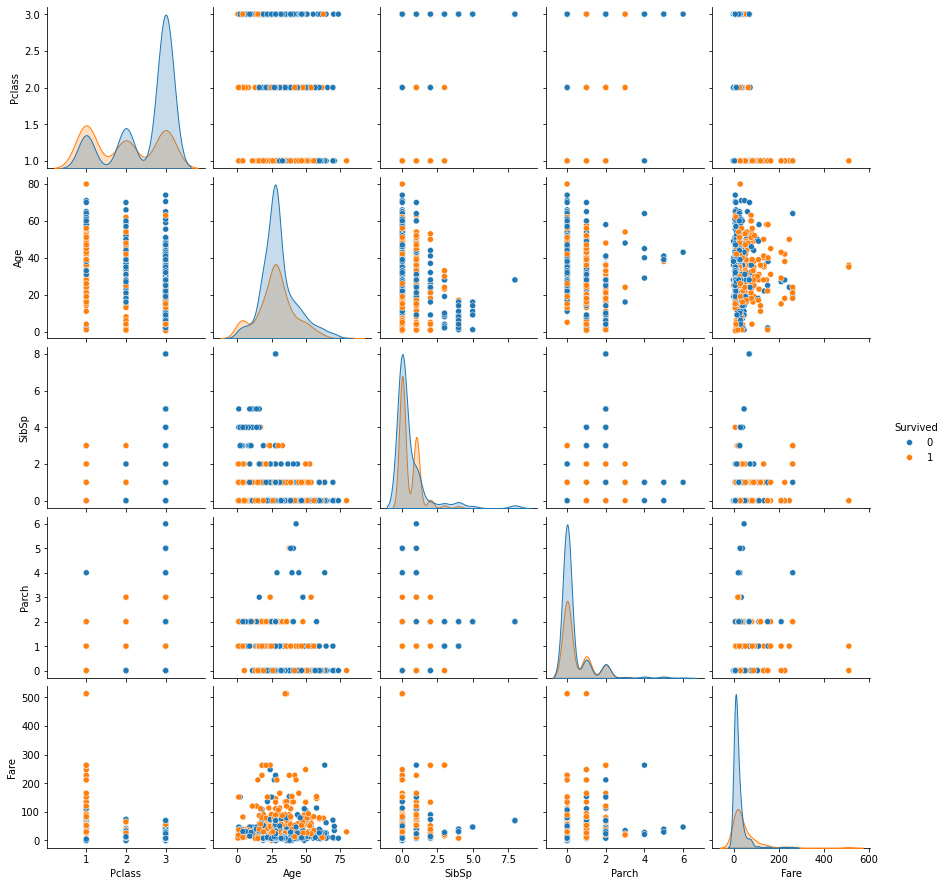

In [14]:
sns.pairplot(dane, kind = 'scatter', hue = "Survived")

##### Korelacja

          Survived  Pclass   Age  SibSp  Parch  Fare
Survived      1.00   -0.34 -0.07  -0.03   0.08  0.26
Pclass       -0.34    1.00 -0.34   0.08   0.02 -0.55
Age          -0.07   -0.34  1.00  -0.23  -0.17  0.09
SibSp        -0.03    0.08 -0.23   1.00   0.41  0.16
Parch         0.08    0.02 -0.17   0.41   1.00  0.22
Fare          0.26   -0.55  0.09   0.16   0.22  1.00


<Axes: >

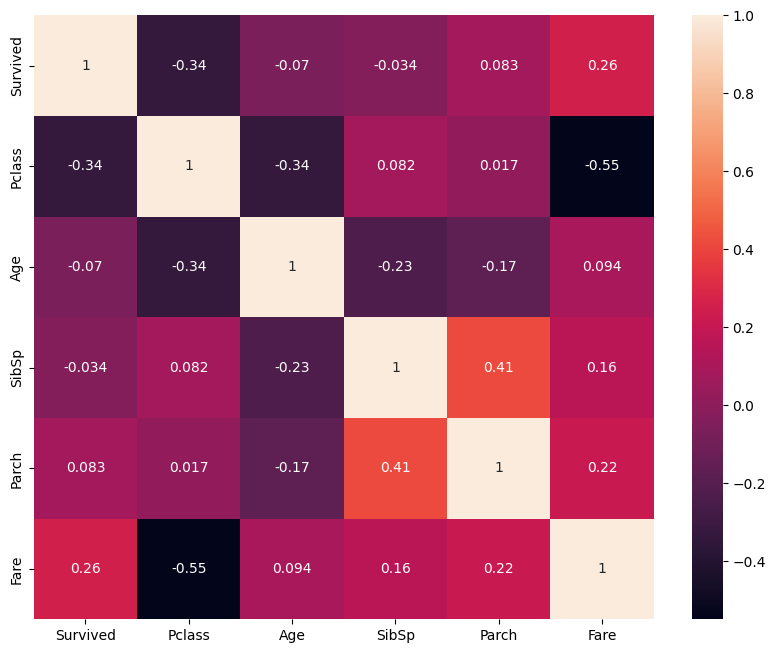

In [15]:
kor = dane.loc[:, np.logical_and(dane.columns != "Sex", dane.columns != "Embarked")].corr()
print(kor)
plt.figure(figsize=(10,8), dpi =100)
sns.heatmap(kor, annot=kor)

Wnioski:
* najsilniej skolerowane są cena biletu (Fare) oraz klasa (Pclass) - cena biletu wyższa dla klasy 1, nieco niższa dla klasy 2 i najniższa dla klasy 3
* z przeżywalnością (survived) najsilniej skolerowana jest klasa, co potwierdza wnioski z analizy zmienności atrybutów

### Uczenie nadzorowane

Żeby wygodniej było prowadzić uczenie nadzorowane, zamieniamy wartości column Sex i Embarked na wartości liczbowe według następnego schematu:  
Sex - (male => 1, female => 0),  
Emarked - (C => 1, S => 2, Q => 3)

In [16]:
print(dane.head())

dane['Sex'] = np.where(dane['Sex'] == 'male', 1, 0)
dane['Embarked'] = np.where(dane['Embarked'] == 'C', 1, dane['Embarked'])
dane['Embarked'] = np.where(dane['Embarked'] == 'S', 2, dane['Embarked'])
dane['Embarked'] = np.where(dane['Embarked'] == 'Q', 3, dane['Embarked'])

print(dane.head())

   Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
0         0       3    male 22.00      1      0  7.25        S
1         1       1  female 38.00      1      0 71.28        C
2         1       3  female 26.00      0      0  7.92        S
3         1       1  female 35.00      1      0 53.10        S
4         0       3    male 35.00      0      0  8.05        S
   Survived  Pclass  Sex   Age  SibSp  Parch  Fare Embarked
0         0       3    1 22.00      1      0  7.25        2
1         1       1    0 38.00      1      0 71.28        1
2         1       3    0 26.00      0      0  7.92        2
3         1       1    0 35.00      1      0 53.10        2
4         0       3    1 35.00      0      0  8.05        2


Wykres punktowy, który pozwoli na określenie, które atrybuty są bardziej, a które mniej istotne w kontekscie uczenia nadzorowanego

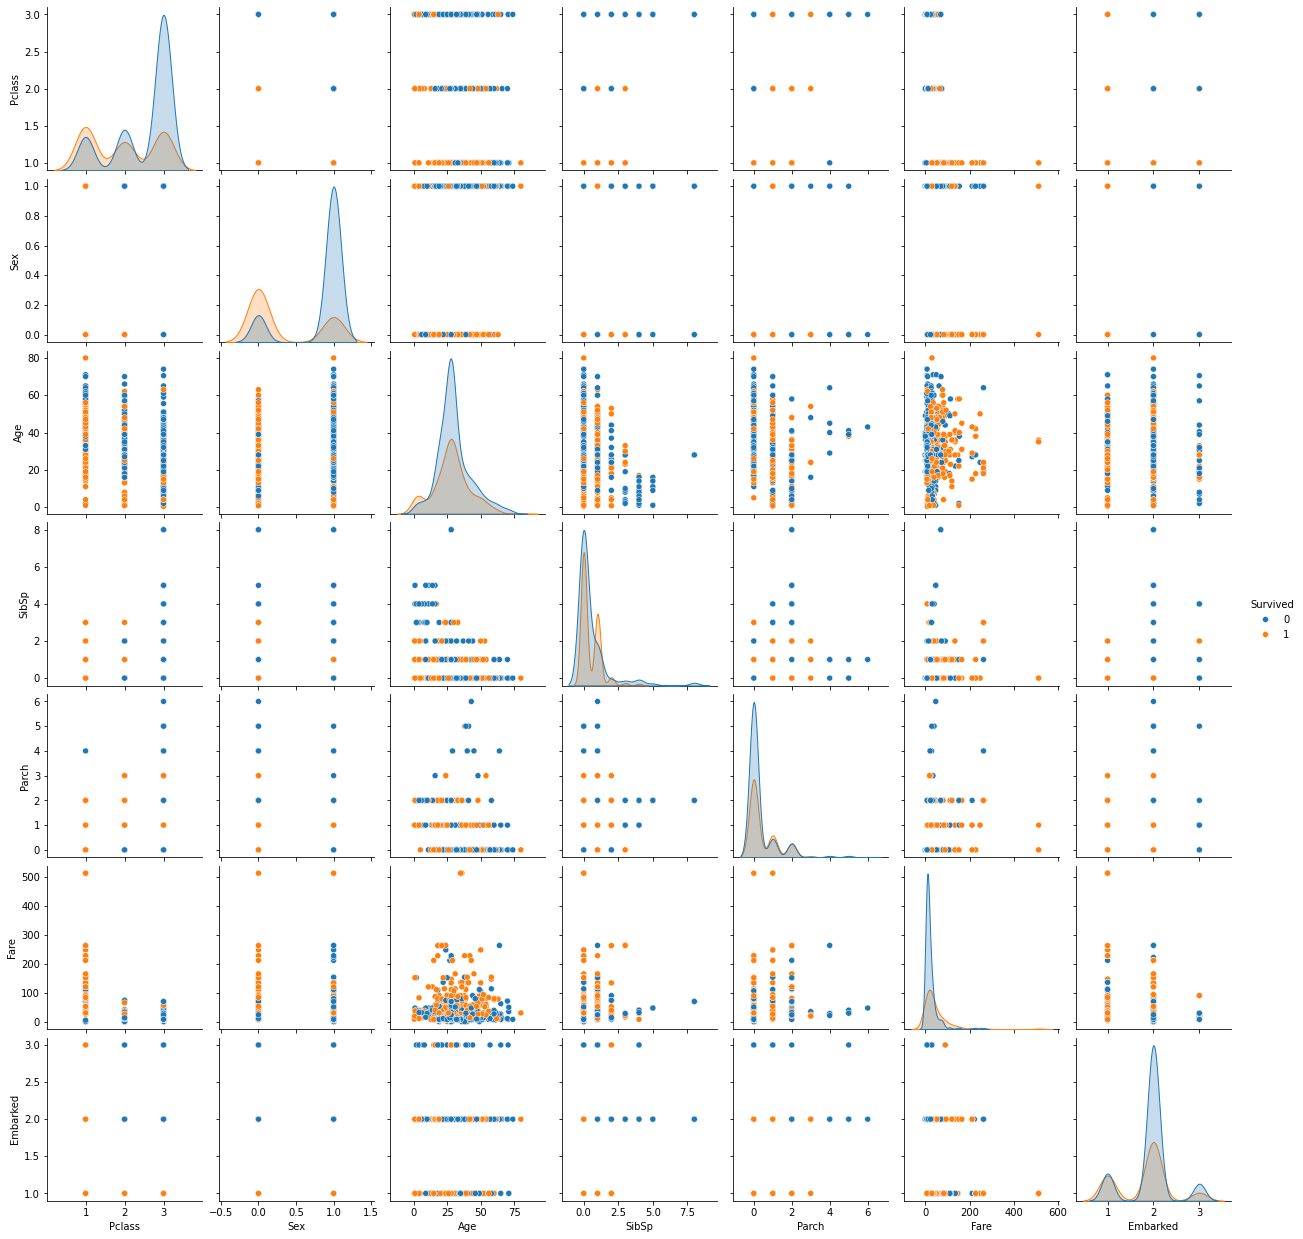

In [17]:
sns.pairplot(dane, kind = 'scatter', hue = "Survived")

Z wykresu punktowego możemy wyciągnąć wniosek, że najbardziej istotnymi dla nas będą pary atrybutów: Sex i Pclass, Pclass i Embarked, Sex i Age, Fare i Sex, Sex i Embarked

Import niezbędnych pakietów oraz funkcje dzielenia zbioru na ucząct i testowy, weryfikacji i wyświtlenia granic

In [18]:
# zdefiniowanie niezbędnych funkcji
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LinearRegression
from sklearn import tree

def podziel(dane,proporcja):
    df = dane.copy()
    # for col in df.columns:
    #     if df[col].dtype == 'object':
    #         le = LabelEncoder()
    #         df[col] = le.fit_transform(df[col])
    X = df.drop('Survived', axis = 1)
    Y = df['Survived'].astype('category').cat.codes
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(X, Y, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

def weryfikuj(model,dane,atryb):
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    mp = confusion_matrix(dane["dec_ucz"],wynik_ucz)
    print("macierz pomyłek - zbiór uczący, dokładność:",np.sum(np.diag(mp))/np.sum(mp))
    print(model.score(dane["opis_ucz"].iloc[:, atryb], dane["dec_ucz"]))
    print(mp)
    mp = confusion_matrix(dane["dec_test"],wynik_test)
    print("macierz pomyłek - zbiór testowy, dokładność:",np.sum(np.diag(mp))/np.sum(mp))
    print(model.score(dane["opis_ucz"].iloc[:, atryb], dane["dec_ucz"]))
    print(mp) 

def granice(model,dane,atr_x, atr_y,tytul,kontur = 1):
    # for col in dane["opis_ucz"].columns:
    #     if dane["opis_ucz"][col].dtype == 'object':
    #         le = LabelEncoder()
    #         dane["opis_ucz"][col] = le.fit_transform(dane["opis_ucz"][col])
    #         dane["opis_test"][col] = le.transform(dane["opis_test"][col])
    if (kontur == 1):    
        model.fit(np.array(dane["opis_ucz"].iloc[:,[atr_x,atr_y]]), np.array(dane["dec_ucz"]))
        x_min = min(dane["opis_ucz"].iloc[:, atr_x].min(),dane["opis_test"].iloc[:, atr_x].min())
        x_max = max(dane["opis_ucz"].iloc[:, atr_x].max(),dane["opis_test"].iloc[:, atr_x].max())
        y_min = min(dane["opis_ucz"].iloc[:, atr_y].min(),dane["opis_test"].iloc[:, atr_y].min())
        y_max = max(dane["opis_ucz"].iloc[:, atr_y].max(),dane["opis_test"].iloc[:, atr_y].max())
        rozst_x = x_max - x_min
        rozst_y = y_max - y_min
        x_min = x_min - 0.1*rozst_x
        x_max = x_max + 0.1*rozst_x
        y_min = y_min - 0.1*rozst_y
        y_max = y_max + 0.1*rozst_y       
        xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/150),
                     np.arange(y_min, y_max, (y_max-y_min)/150))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    plt.figure(dpi = 100)
    plt.title(tytul)
    if (kontur == 1):
        plt.contourf(xx, yy, Z, levels = 4, alpha=0.2)
    plt.scatter(dane["opis_ucz"].iloc[:, atr_x], dane["opis_ucz"].iloc[:, atr_y], c=dane["dec_ucz"], marker = '.')
    plt.scatter(dane["opis_test"].iloc[:, atr_x], dane["opis_test"].iloc[:, atr_y], c=dane["dec_test"], marker = 'x')

Wybrane pary atrybutów dla uczenia nadzorowanego i podział zbioru danych

In [19]:
atrybuty = [ ['Sex', 'Pclass'], ['Pclass', 'Embarked'], ['Sex', 'Age'], ['Fare', 'Sex'], ['Sex', 'Embarked']]

# podział zbioru danych
dane_podzielone = podziel(dane,0.3)

Metoda k-najbliższych sąsiadów.

macierz pomyłek - zbiór uczący, dokładność: 0.7861736334405145
0.7861736334405145
[[323  56]
 [ 77 166]]
macierz pomyłek - zbiór testowy, dokładność: 0.7865168539325843
0.7861736334405145
[[145  25]
 [ 32  65]]
macierz pomyłek - zbiór uczący, dokładność: 0.657556270096463
0.657556270096463
[[289  90]
 [123 120]]
macierz pomyłek - zbiór testowy, dokładność: 0.6741573033707865
0.657556270096463
[[130  40]
 [ 47  50]]
macierz pomyłek - zbiór uczący, dokładność: 0.7877813504823151
0.7877813504823151
[[320  59]
 [ 73 170]]
macierz pomyłek - zbiór testowy, dokładność: 0.7415730337078652
0.7877813504823151
[[140  30]
 [ 39  58]]
macierz pomyłek - zbiór uczący, dokładność: 0.8536977491961415
0.8536977491961415
[[330  49]
 [ 42 201]]
macierz pomyłek - zbiór testowy, dokładność: 0.704119850187266
0.8536977491961415
[[123  47]
 [ 32  65]]
macierz pomyłek - zbiór uczący, dokładność: 0.7861736334405145
0.7861736334405145
[[323  56]
 [ 77 166]]
macierz pomyłek - zbiór testowy, dokładność: 0.78651685

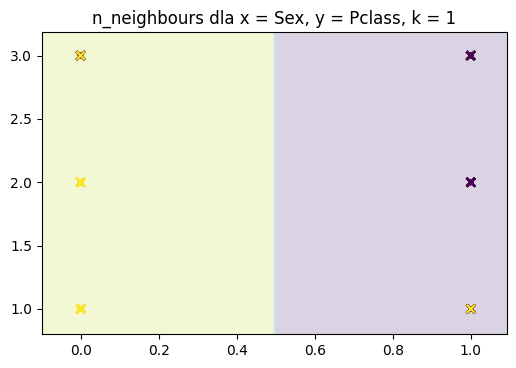

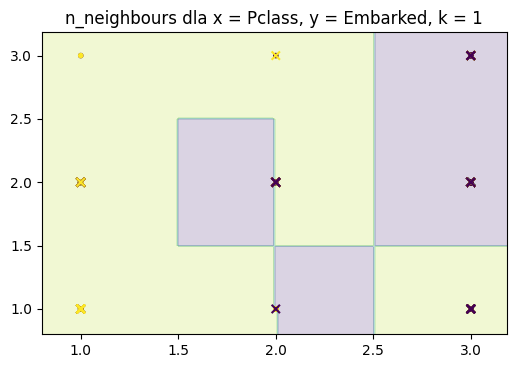

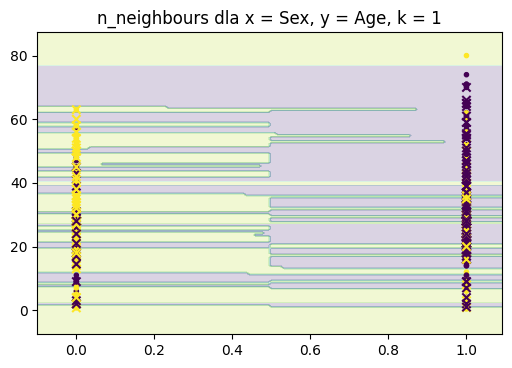

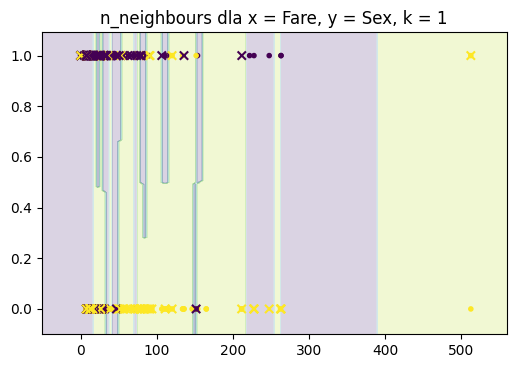

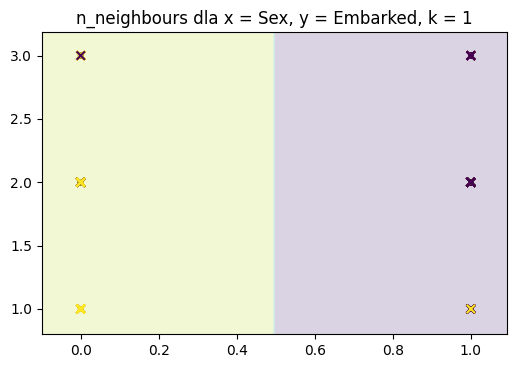

In [20]:
#wybór liczby sąsiadów
k = 1

# zdefiniowanie modelu klasyfikatora
model = KNeighborsClassifier(n_neighbors=k)

for aktualne_atrybuty in atrybuty:
    atrybut_1  = aktualne_atrybuty[0]
    atrybut_2 = aktualne_atrybuty[1]

    atrybut_1_index = dane.columns.get_loc(atrybut_1) - 1
    atrybut_2_index = dane.columns.get_loc(atrybut_2) - 1

    # zdefiniowanie modelu klasyfikatora
    model = KNeighborsClassifier(n_neighbors=k)

    # weryfikacja
    weryfikuj(model,dane_podzielone,[atrybut_1_index,atrybut_2_index])

    granice(model, dane_podzielone, atrybut_1_index, atrybut_2_index, "n_neighbours dla x = " + atrybut_1 + ", y = " + atrybut_2 + ", k = " + str(k))

Naiwny klasyfikator Bayesa

macierz pomyłek - zbiór uczący, dokładność: 0.7861736334405145
0.7861736334405145
[[323  56]
 [ 77 166]]
macierz pomyłek - zbiór testowy, dokładność: 0.7865168539325843
0.7861736334405145
[[145  25]
 [ 32  65]]
macierz pomyłek - zbiór uczący, dokładność: 0.6655948553054662
0.6655948553054662
[[315  64]
 [144  99]]
macierz pomyłek - zbiór testowy, dokładność: 0.7116104868913857
0.6655948553054662
[[146  24]
 [ 53  44]]
macierz pomyłek - zbiór uczący, dokładność: 0.7861736334405145
0.7861736334405145
[[323  56]
 [ 77 166]]
macierz pomyłek - zbiór testowy, dokładność: 0.7865168539325843
0.7861736334405145
[[145  25]
 [ 32  65]]
macierz pomyłek - zbiór uczący, dokładność: 0.7797427652733119
0.7797427652733119
[[314  65]
 [ 72 171]]
macierz pomyłek - zbiór testowy, dokładność: 0.7827715355805244
0.7797427652733119
[[142  28]
 [ 30  67]]
macierz pomyłek - zbiór uczący, dokładność: 0.7861736334405145
0.7861736334405145
[[323  56]
 [ 77 166]]
macierz pomyłek - zbiór testowy, dokładność: 0.7865

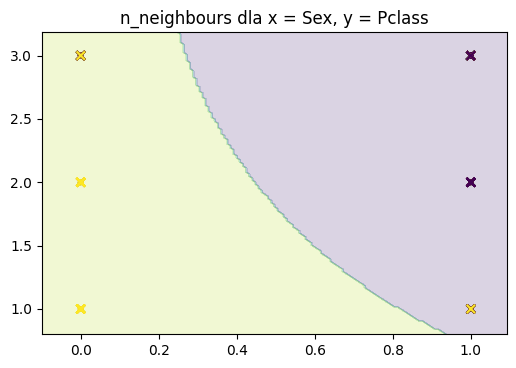

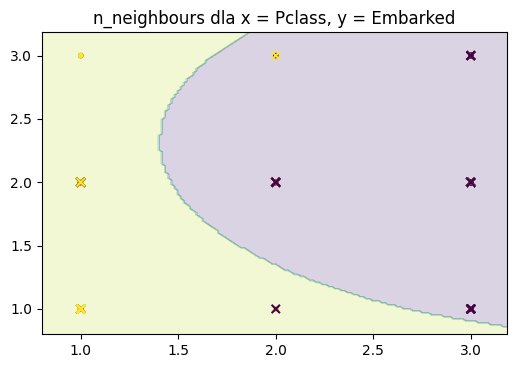

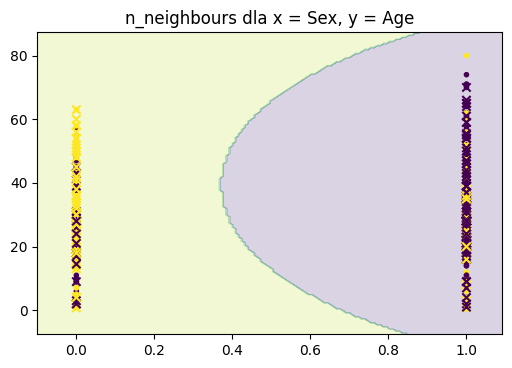

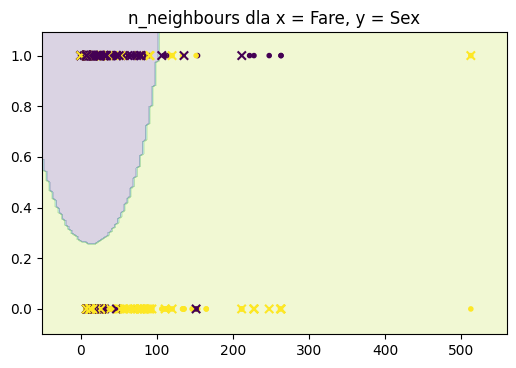

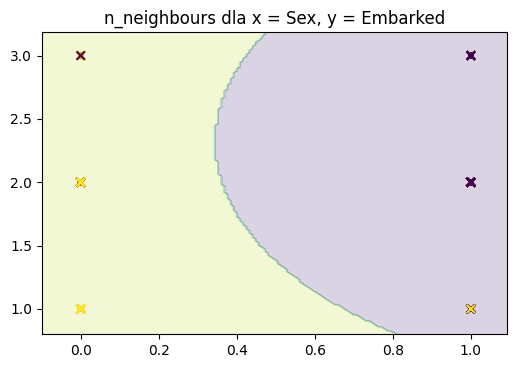

In [ ]:
# zdefiniowanie modelu klasyfikatora
model = KNeighborsClassifier(n_neighbors=k)

for aktualne_atrybuty in atrybuty:
    atrybut_1  = aktualne_atrybuty[0]
    atrybut_2 = aktualne_atrybuty[1]

    atrybut_1_index = dane.columns.get_loc(atrybut_1) - 1
    atrybut_2_index = dane.columns.get_loc(atrybut_2) - 1

    # zdefiniowanie modelu klasyfikatora
    model = GaussianNB()

    # weryfikacja
    weryfikuj(model,dane_podzielone,[atrybut_1_index,atrybut_2_index])

    granice(model, dane_podzielone, atrybut_1_index, atrybut_2_index, "Klasyfikator Bayesa dla x = " + atrybut_1 + ", y = " + atrybut_2)

### Osobny model Bayesa dla kobiet i mężczyzn

In [22]:
# zdefiniowanie niezbędnych funkcji
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def podziel(dane,proporcja):
    df = dane.copy()
    # for col in df.columns:
    #     if df[col].dtype == 'object':
    #         le = LabelEncoder()
    #         df[col] = le.fit_transform(df[col])
    X = df.drop('Survived', axis = 1)
    Y = df['Survived'].astype('category').cat.codes
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(X, Y, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

def weryfikuj(model,dane,atryb):
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    mp = confusion_matrix(dane["dec_ucz"],wynik_ucz)
    print("macierz pomyłek - zbiór uczący, dokładność:",np.sum(np.diag(mp))/np.sum(mp))
    print(model.score(dane["opis_ucz"].iloc[:, atryb], dane["dec_ucz"]))
    print(mp)
    mp = confusion_matrix(dane["dec_test"],wynik_test)
    print("macierz pomyłek - zbiór testowy, dokładność:",np.sum(np.diag(mp))/np.sum(mp))
    print(model.score(dane["opis_ucz"].iloc[:, atryb], dane["dec_ucz"]))
    print(mp) 

def granice(model,dane,atr_x, atr_y,tytul,kontur = 1):
    # for col in dane["opis_ucz"].columns:
    #     if dane["opis_ucz"][col].dtype == 'object':
    #         le = LabelEncoder()
    #         dane["opis_ucz"][col] = le.fit_transform(dane["opis_ucz"][col])
    #         dane["opis_test"][col] = le.transform(dane["opis_test"][col])
    if (kontur == 1):    
        model.fit(np.array(dane["opis_ucz"].iloc[:,[atr_x,atr_y]]), np.array(dane["dec_ucz"]))
        x_min = min(dane["opis_ucz"].iloc[:, atr_x].min(),dane["opis_test"].iloc[:, atr_x].min())
        x_max = max(dane["opis_ucz"].iloc[:, atr_x].max(),dane["opis_test"].iloc[:, atr_x].max())
        y_min = min(dane["opis_ucz"].iloc[:, atr_y].min(),dane["opis_test"].iloc[:, atr_y].min())
        y_max = max(dane["opis_ucz"].iloc[:, atr_y].max(),dane["opis_test"].iloc[:, atr_y].max())
        rozst_x = x_max - x_min
        rozst_y = y_max - y_min
        x_min = x_min - 0.1*rozst_x
        x_max = x_max + 0.1*rozst_x
        y_min = y_min - 0.1*rozst_y
        y_max = y_max + 0.1*rozst_y       
        xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/150),
                     np.arange(y_min, y_max, (y_max-y_min)/150))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    plt.figure(dpi = 100)
    plt.title(tytul)
    if (kontur == 1):
        plt.contourf(xx, yy, Z, levels = 4, alpha=0.2)
    plt.scatter(dane["opis_ucz"].iloc[:, atr_x], dane["opis_ucz"].iloc[:, atr_y], c=dane["dec_ucz"], marker = '.')
    plt.scatter(dane["opis_test"].iloc[:, atr_x], dane["opis_test"].iloc[:, atr_y], c=dane["dec_test"], marker = 'x')

Z uwzględnieniem płci
x=Pclass y=Embarked
macierz pomyłek - zbiór uczący, dokładność: 0.680064308681672
0.680064308681672
[[328  65]
 [134  95]]
macierz pomyłek - zbiór testowy, dokładność: 0.6779026217228464
0.680064308681672
[[133  23]
 [ 63  48]]
Bez uwzględnienia płci
x=Pclass y=Embarked
macierz pomyłek - zbiór uczący, dokładność: 0.6864951768488746
0.6864951768488746
[[331  64]
 [131  96]]
macierz pomyłek - zbiór testowy, dokładność: 0.6629213483146067
0.6864951768488746
[[130  24]
 [ 66  47]]
   Survived  Pclass  Sex   Age  SibSp  Parch  Fare Embarked
0         0       3    1 22.00      1      0  7.25        2
1         1       1    0 38.00      1      0 71.28        1
2         1       3    0 26.00      0      0  7.92        2
3         1       1    0 35.00      1      0 53.10        2
4         0       3    1 35.00      0      0  8.05        2
{'opis_ucz':      Pclass   Age  SibSp  Parch   Fare Embarked
325       1 36.00      0      0 135.63        1
654       3 18.00      0   

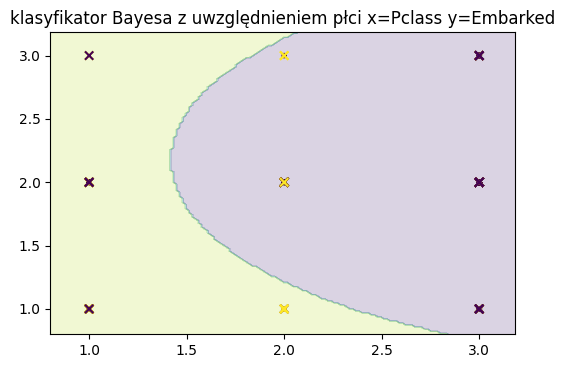

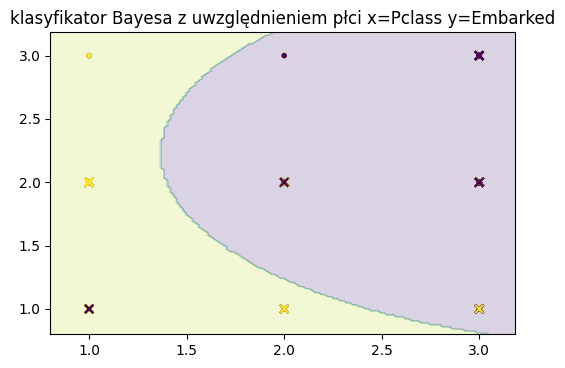

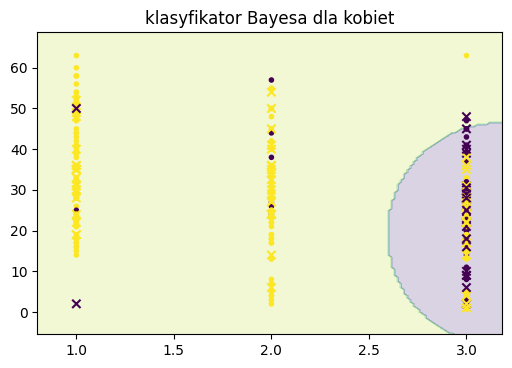

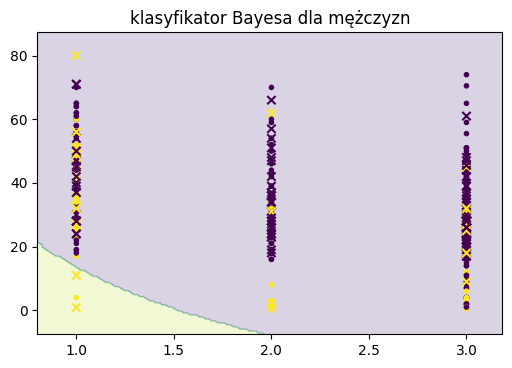

In [23]:
def show_output1(dane, a1, a2):
    d = podziel(dane, 0.3)
    model = GaussianNB()
    granice(model,d,a1,a2,"klasyfikator Bayesa z uwzględnieniem płci x="+str(d["opis_ucz"].columns[a1])+" y="+str(d["opis_ucz"].columns[a2]))
    print("x="+str(d["opis_ucz"].columns[a1])+" y="+str(d["opis_ucz"].columns[a2]))
    weryfikuj(model,d,[a1,a2])
print("Z uwzględnieniem płci")
show_output1(dane, 0,6)
print("Bez uwzględnienia płci")
show_output1(dane.drop('Sex', axis=1), 0,5)
a1=0
a2=1
print(dane.head())
d = podziel(dane[dane['Sex']==0].drop('Sex', axis=1), 0.3)
print(d)
model = GaussianNB()
granice(model,d,a1,a2,"klasyfikator Bayesa dla kobiet")
weryfikuj(model,d,[a1,a2])
d = podziel(dane[dane['Sex']==1].drop('Sex', axis=1), 0.3)
print(d)
model = GaussianNB()
granice(model,d,a1,a2,"klasyfikator Bayesa dla mężczyzn")
weryfikuj(model,d,[a1,a2])